In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
df_train.dropna(inplace=True)
df_train.head()

# Shape is -> (221259, 6)

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0


In [3]:
df_train.describe()

,id,num_sold
count,221259.000000,221259.000000
mean,115398.848472,752.527382
std,66315.365084,690.165445
min,1.000000,5.000000
25%,58160.500000,219.000000
50%,115552.000000,605.000000
75%,172688.500000,1114.000000
max,230129.000000,5939.000000


In [4]:
# Analysing if our data follows normal distrbution emperical  rule i.e. (68-95-99.7 rule)

# 68% of data must lie 1 std from mean -> (u + 1std) or (u -1std)

m=752.527382
std=690.165445
count=0
pos_range=m+std
neg_range=m-std
for i in df_train['num_sold'].values:
    if i<=pos_range and i>=neg_range:
        count+=1
print((count/221259)*100)
#  we got 69% as output

69.73818014182473


In [5]:
# 95% of data must lie 2 std from mean -> (u + 2std) or (u -2std)
m=752.527382
std=690.165445
count=0
pos_range=m+2*std
neg_range=m-2*std
for i in df_train['num_sold'].values:
    if i<=pos_range and i>=neg_range:
        count+=1
print((count/221259)*100)

#  we got 95% as output

95.55905070528205


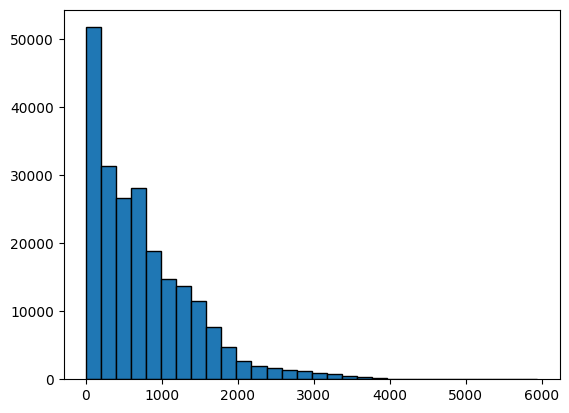

In [6]:
import matplotlib.pyplot as plt

# x=df_train['id']
# y=df_train['num_sold']

plt.hist(df_train['num_sold'],bins=30,edgecolor='black')
plt.show()


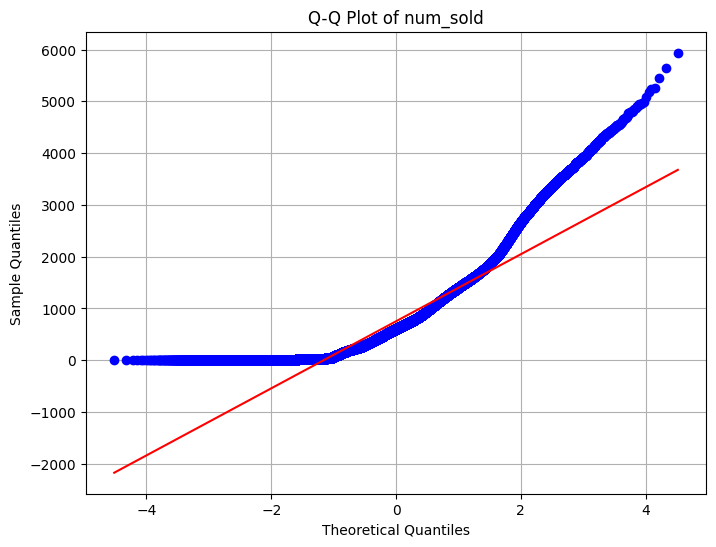

In [7]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df_train['num_sold'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of num_sold')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

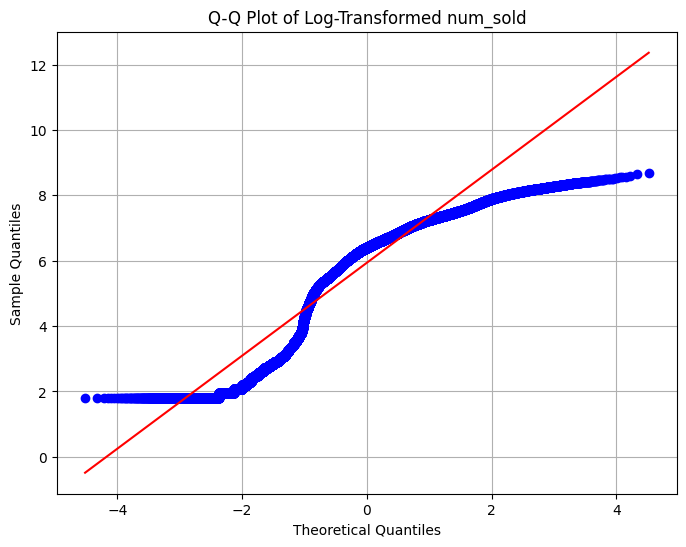

In [8]:
#
df_train['num_sold_log'] = np.log1p(df_train['num_sold'].dropna())

# Create Q-Q plot for the transformed data
plt.figure(figsize=(8, 6))
stats.probplot(df_train['num_sold_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed num_sold')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

In [9]:
df_train.head()

,id,date,country,store,product,num_sold,num_sold_log
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,6.881411
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,6.810142
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,6.049733
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,6.198479
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,5.707110


In [10]:
# unique element in country column ->  ['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df_train['country'].values.reshape(-1, 1))  # Fit with the country column
result = enc.transform(df_train['country'].values.reshape(-1, 1)).toarray()

# Get feature names for the new columns
col_names = enc.get_feature_names_out(['country'])

# Convert result into a DataFrame
onehot_df = pd.DataFrame(result, columns=col_names)

# Concatenate with original df_train
df_train = pd.concat([df_train, onehot_df], axis=1)

# Now check the head
df_train.head()

,id,date,country,store,product,num_sold,num_sold_log,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
1,1.0,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,6.881411,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,6.810142,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,6.049733,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,6.198479,1.0,0.0,0.0,0.0,0.0,0.0
5,5.0,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,5.707110,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_train=df_train[[i for i in df_train.columns if i!='num_sold_log']+['num_sold_log']]


In [12]:
df_train.head()

,id,date,country,store,product,num_sold,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,num_sold_log
1,1.0,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1.0,0.0,0.0,0.0,0.0,0.0,6.881411
2,2.0,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1.0,0.0,0.0,0.0,0.0,0.0,6.810142
3,3.0,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1.0,0.0,0.0,0.0,0.0,0.0,6.049733
4,4.0,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1.0,0.0,0.0,0.0,0.0,0.0,6.198479
5,5.0,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,1.0,0.0,0.0,0.0,0.0,0.0,5.707110


In [13]:
df_train.drop(['country','num_sold'],axis=1,inplace=True)

In [14]:
df_train.head()

,id,date,store,product,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,num_sold_log
1,1.0,2010-01-01,Discount Stickers,Kaggle,1.0,0.0,0.0,0.0,0.0,0.0,6.881411
2,2.0,2010-01-01,Discount Stickers,Kaggle Tiers,1.0,0.0,0.0,0.0,0.0,0.0,6.810142
3,3.0,2010-01-01,Discount Stickers,Kerneler,1.0,0.0,0.0,0.0,0.0,0.0,6.049733
4,4.0,2010-01-01,Discount Stickers,Kerneler Dark Mode,1.0,0.0,0.0,0.0,0.0,0.0,6.198479
5,5.0,2010-01-01,Stickers for Less,Holographic Goose,1.0,0.0,0.0,0.0,0.0,0.0,5.707110


In [15]:
# handling -> product data

# Testing Data

In [16]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
df_test.dropna(inplace=True)
df_test.head()
# Shape is -> (98550, 5)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [17]:
enc_test = OneHotEncoder()
enc_test.fit(df_test['country'].values.reshape(-1, 1))  # Fit with the country column
result_test = enc_test.transform(df_test['country'].values.reshape(-1, 1)).toarray()

# Get feature names for the new columns
col_names_test = enc_test.get_feature_names_out(['country'])

# Convert result into a DataFrame
onehot_df_test = pd.DataFrame(result_test, columns=col_names_test)

# Concatenate with original df_train
df_test = pd.concat([df_test, onehot_df_test], axis=1)

# Now check the head


In [18]:
df_test.drop(['country'],axis=1,inplace=True)

In [19]:
df_test.head()

,id,date,store,product,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
0,230130,2017-01-01,Discount Stickers,Holographic Goose,1.0,0.0,0.0,0.0,0.0,0.0
1,230131,2017-01-01,Discount Stickers,Kaggle,1.0,0.0,0.0,0.0,0.0,0.0
2,230132,2017-01-01,Discount Stickers,Kaggle Tiers,1.0,0.0,0.0,0.0,0.0,0.0
3,230133,2017-01-01,Discount Stickers,Kerneler,1.0,0.0,0.0,0.0,0.0,0.0
4,230134,2017-01-01,Discount Stickers,Kerneler Dark Mode,1.0,0.0,0.0,0.0,0.0,0.0
